In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import zarr
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
import gym_pusht


def make_env():
    # Adjust the env_id if you are using a specific repo 
    # (e.g., 'gym_pusht/PushT-v0' or a local import like PushTImageEnv)
    ENV_ID = "gym_pusht/PushT-v0"

    try:
        # We use render_mode='human' to see the replay live, 
        # or 'rgb_array' if you want to save frames.
        env = gym.make(ENV_ID, render_mode="human")
        # env = gym.make(ENV_ID, render_mode="rgb_array")
        
        print(f"Successfully created environment: {ENV_ID}")
        
        # Reset to check if it works
        obs, info = env.reset()
        
    except Exception as e:
        print(f"Error creating environment: {e}")
        print("Ensure gym-pusht is installed or adjust the ENV_ID.")
        # print out the environments that gym is aware of
        print("Available environments:", gym.envs.registry.keys())
        env=None
    return env

In [ ]:
def inspect_zarr_file(zarr_path):
    """
    Opens the Zarr file and prints the tree structure 
    to help identify the keys for states, actions, and images.
    """
    try:
        root = zarr.open(zarr_path, mode='r')
        print(f"Opened Zarr file at: {zarr_path}")
        print("-" * 20)
        print(root.tree())
        return root
    except Exception as e:
        print(f"Failed to load Zarr file. Download from https://diffusion-policy.cs.columbia.edu/data/training/ : {e}.")
        return None

# Replace with your actual path
ZARR_PATH = "/home/james/workspace/gym-pusht/demonstrations/pusht/pusht_cchi_v7_replay.zarr"
root = inspect_zarr_file(ZARR_PATH)

Opened Zarr file at: /home/james/workspace/gym-pusht/demonstrations/pusht/pusht_cchi_v7_replay.zarr
--------------------
/
 ├── data
 │   ├── action (25650, 2) float32
 │   ├── img (25650, 96, 96, 3) float32
 │   ├── keypoint (25650, 9, 2) float32
 │   ├── n_contacts (25650, 1) float32
 │   └── state (25650, 5) float32
 └── meta
     └── episode_ends (206,) int64


In [5]:
def find_offset(zarr_path, ep_idx):
    root = zarr.open(zarr_path, mode='r')
    
    # Grab the first frame
    state_0 = root['data/state'][ep_idx]    # [agent_x, agent_y, block_x, block_y, angle]
    kps_0 = root['data/keypoint'][ep_idx]   # [k1, k2, ..., k9]
    
    # Physics position of the block from state
    physics_pos = state_0[2:4]
    
    # Visual center is usually roughly the mean of all keypoints
    # OR sometimes specifically keypoint index 3 or 4 depending on the specific PushT version
    visual_pos = np.mean(kps_0, axis=0) 
    
    offset = physics_pos - visual_pos
    
    print(f"Physics Position: {physics_pos}")
    print(f"Visual Centroid:  {visual_pos}")
    print(f"Calculated Offset: {offset}")
    return offset

offset = find_offset(ZARR_PATH, 0)

Physics Position: [222.99382 381.59903]
Visual Centroid:  [217.55998 341.68152]
Calculated Offset: [ 5.433838 39.91751 ]


Loaded 206 episodes.
Pusht force sparse reward:  False  display_cross:  False
Successfully created environment: gym_pusht/PushT-v0


/home/james/.local/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:265: UserWarning: WARN: Human rendering should return `None`, got <class 'numpy.ndarray'>
  logger.warn(


diff position +89.80


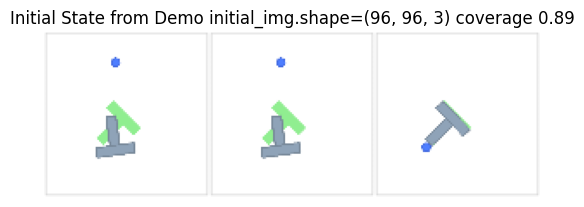

Episode replay complete. info['coverage']=0.8898037830427018
diff position +14.01


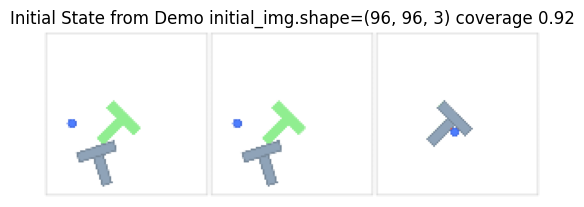

Episode replay complete. info['coverage']=0.9199308306114586
diff position +89.77


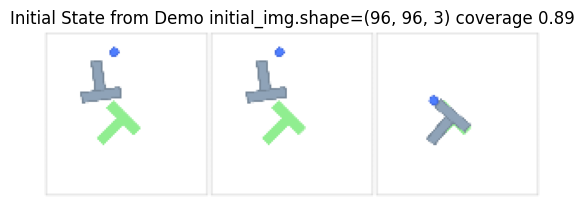

Episode replay complete. info['coverage']=0.8890910536260553
diff position +85.90


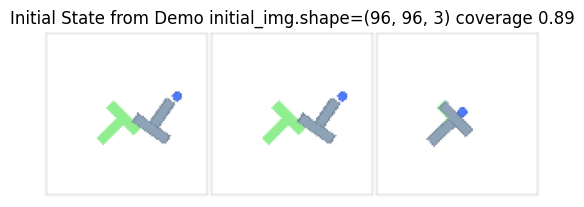

Episode replay complete. info['coverage']=0.8933333079618371
diff position +6.12


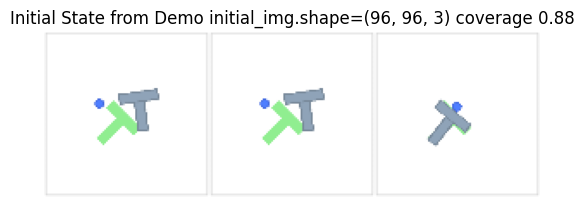

Episode replay complete. info['coverage']=0.8782058833003543
diff position +89.76


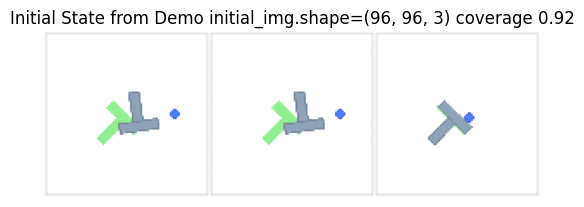

Episode replay complete. info['coverage']=0.918488084987657
diff position +76.58


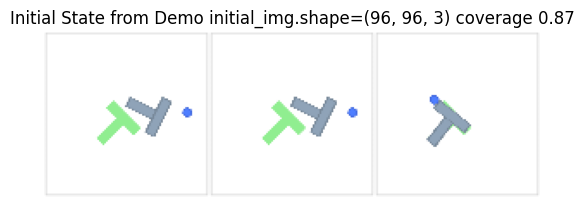

Episode replay complete. info['coverage']=0.870952111137702
diff position +89.39


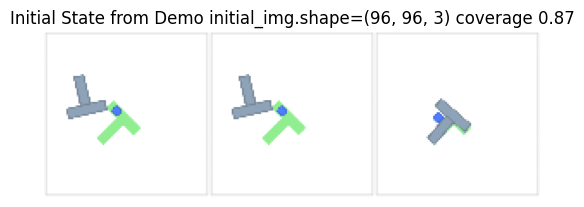

Episode replay complete. info['coverage']=0.8701028784670859
diff position +50.15


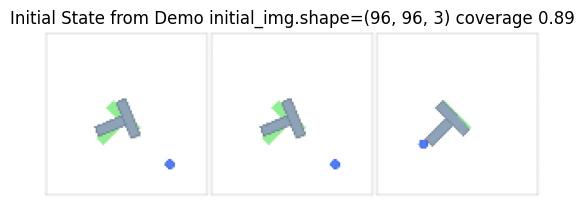

Episode replay complete. info['coverage']=0.8877339108471203
diff position +26.02


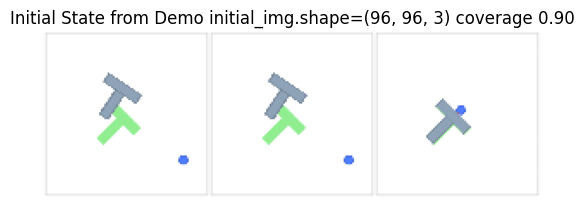

Episode replay complete. info['coverage']=0.9018052791237803
diff position +52.93


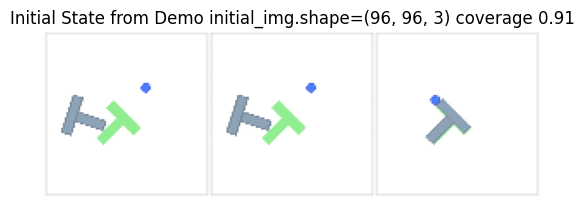

Episode replay complete. info['coverage']=0.9073913968252068
diff position +49.43


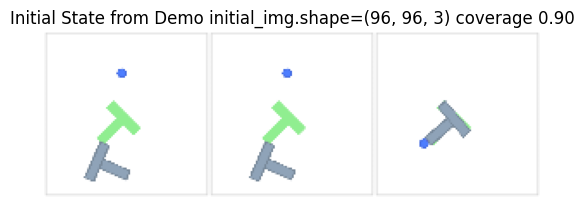

Episode replay complete. info['coverage']=0.8990448489441055
diff position +66.37


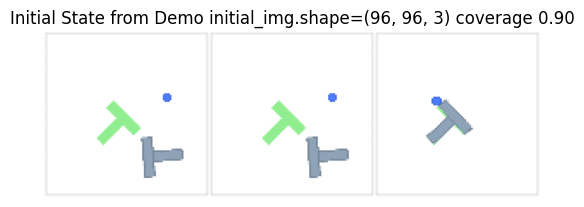

Episode replay complete. info['coverage']=0.9034657702994593
diff position +89.12


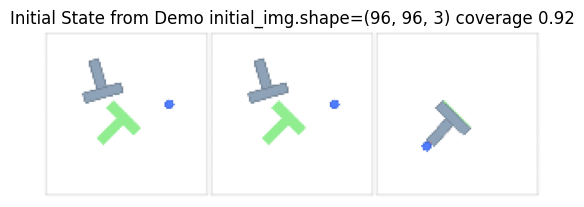

Episode replay complete. info['coverage']=0.9172006948183242
diff position +89.87


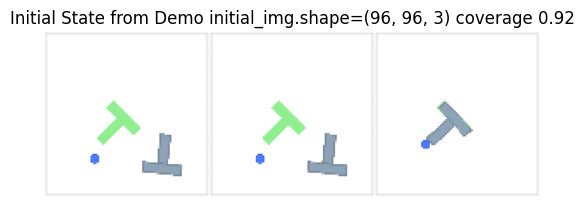

Episode replay complete. info['coverage']=0.9165907518964853
diff position +85.78


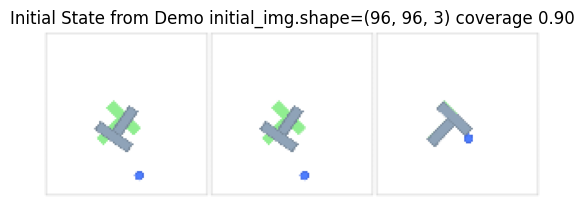

Episode replay complete. info['coverage']=0.9007152212880574
diff position +26.32


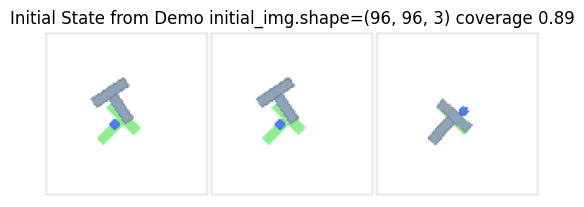

Episode replay complete. info['coverage']=0.8852795381288447
diff position +34.28


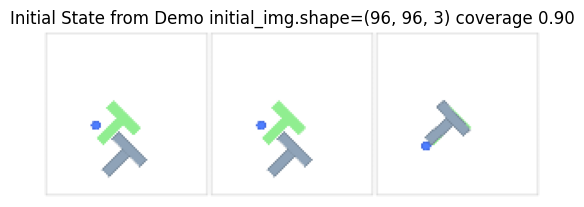

Episode replay complete. info['coverage']=0.8993194998179741
diff position +46.42


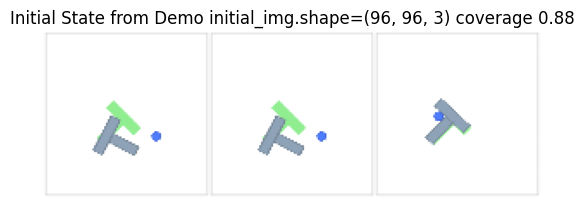

Episode replay complete. info['coverage']=0.8770150331884023
diff position +27.62


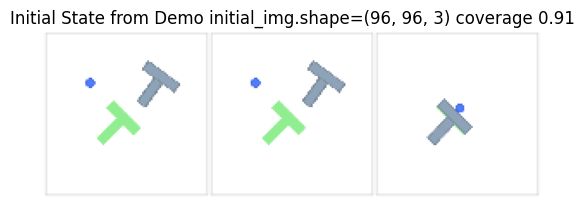

Episode replay complete. info['coverage']=0.9078569956263994
diff position +88.91


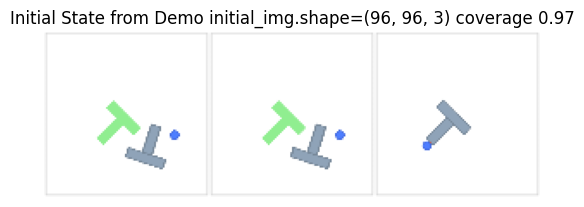

Episode replay complete. info['coverage']=0.9661294875110699
diff position +78.41


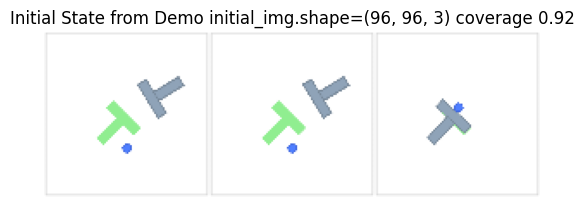

Episode replay complete. info['coverage']=0.918083337417216
diff position +89.58


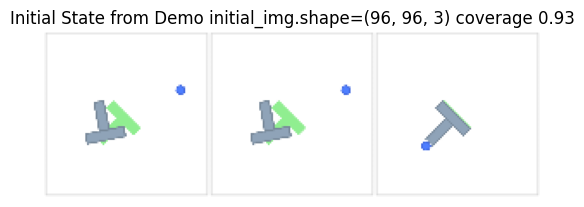

Episode replay complete. info['coverage']=0.9297272651338823
diff position +27.19


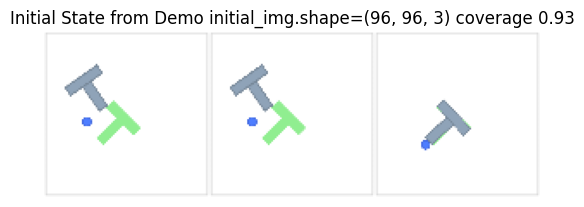

Episode replay complete. info['coverage']=0.9262386117207755
diff position +89.98


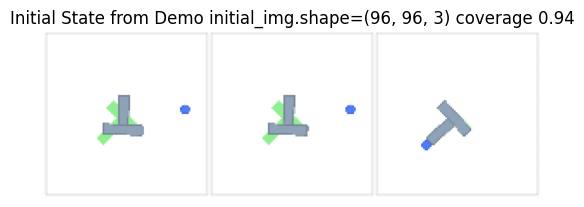

Episode replay complete. info['coverage']=0.9393928034083585
diff position +41.76


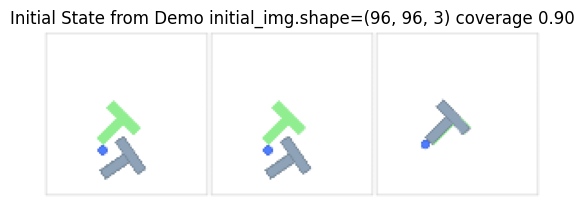

Episode replay complete. info['coverage']=0.900351982462776
diff position +30.03


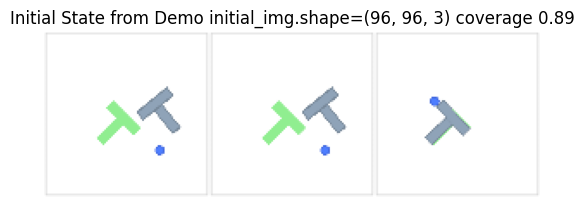

Episode replay complete. info['coverage']=0.8917421826392431
diff position +51.22


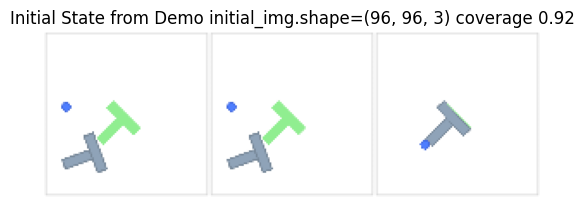

Episode replay complete. info['coverage']=0.9242668260280048
diff position +41.87


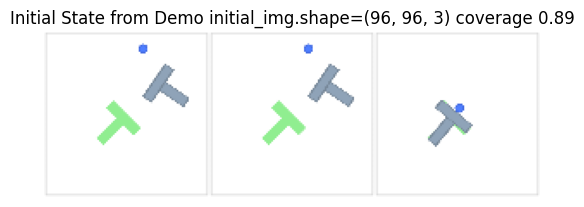

Episode replay complete. info['coverage']=0.8867972280566813
diff position +57.44


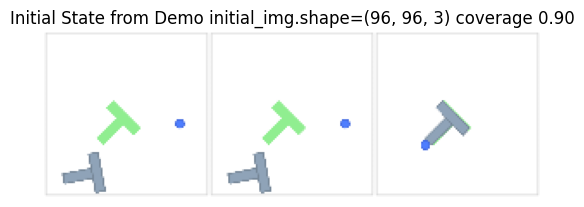

Episode replay complete. info['coverage']=0.8957732920347424
diff position +8.22


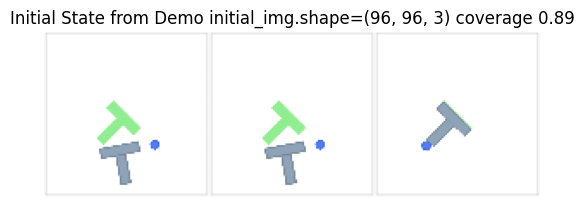

Episode replay complete. info['coverage']=0.893388812121883
diff position +25.44


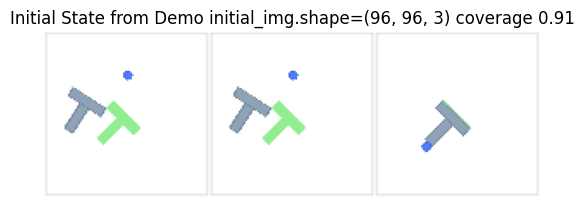

Episode replay complete. info['coverage']=0.9061747744352306
diff position +77.20


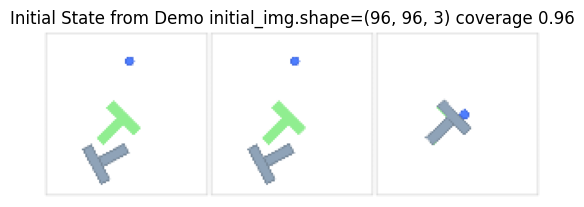

Episode replay complete. info['coverage']=0.9624604752542277
diff position +9.94


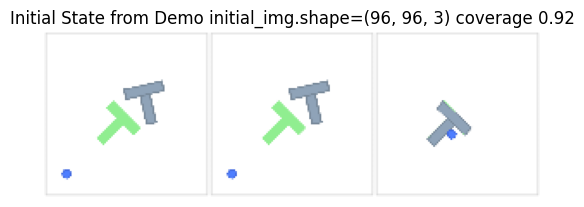

Episode replay complete. info['coverage']=0.9226196267170962
diff position +84.06


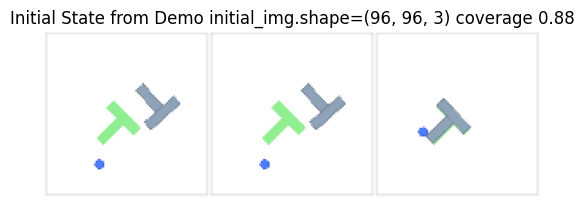

Episode replay complete. info['coverage']=0.880997673700557
diff position +78.23


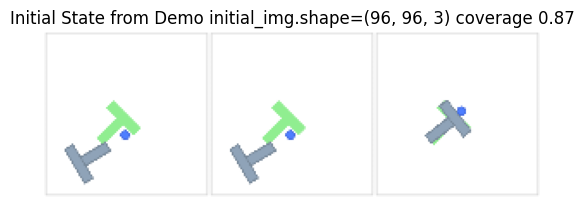

Episode replay complete. info['coverage']=0.8689915184323544
diff position +48.38


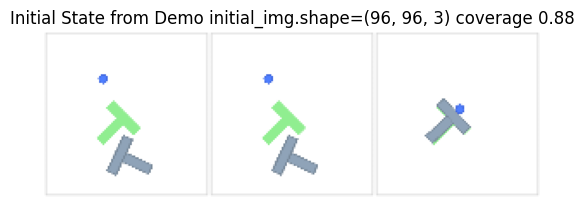

Episode replay complete. info['coverage']=0.8775638661060378
diff position +74.09


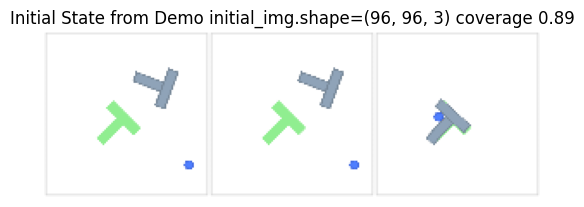

Episode replay complete. info['coverage']=0.8905009103655764
diff position +55.44


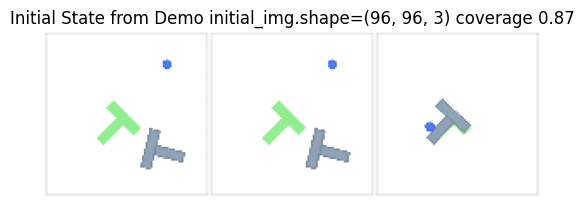

Episode replay complete. info['coverage']=0.87237298932694
diff position +80.78


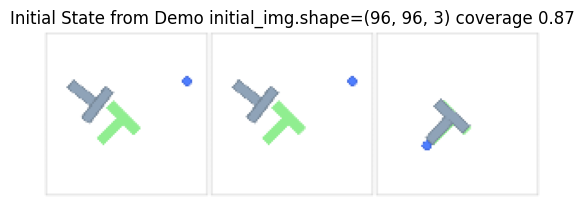

Episode replay complete. info['coverage']=0.8699715509451809
diff position +49.32


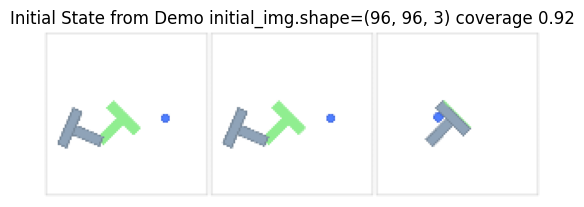

Episode replay complete. info['coverage']=0.9160138293591922
diff position +63.53


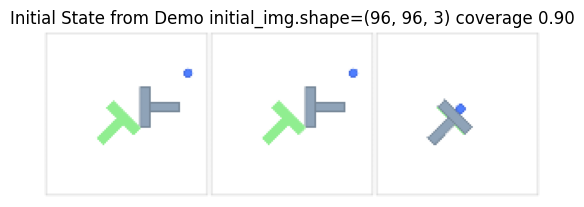

Episode replay complete. info['coverage']=0.9044667201573822
diff position +7.38


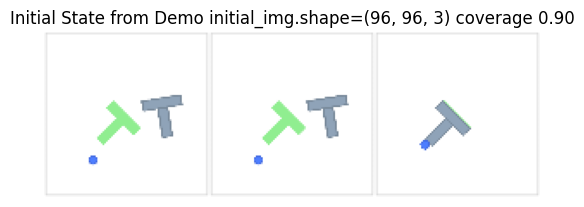

Episode replay complete. info['coverage']=0.9008388036579243
diff position +59.01


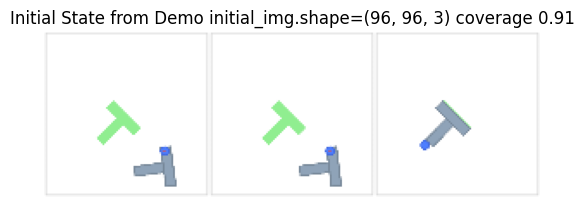

Episode replay complete. info['coverage']=0.9099264215832882
diff position +80.32


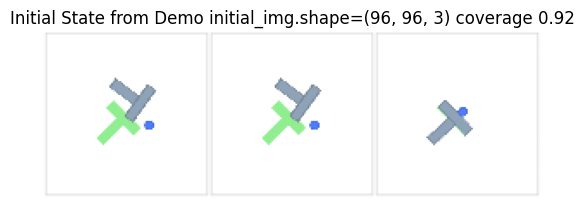

Episode replay complete. info['coverage']=0.9167519144211016
diff position +85.24


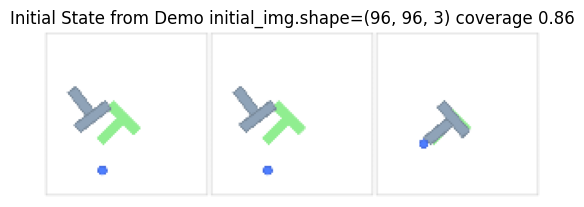

Episode replay complete. info['coverage']=0.8605155707323431
diff position +10.63


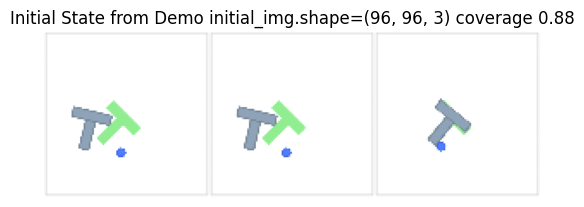

Episode replay complete. info['coverage']=0.8752646337619214
diff position +15.98


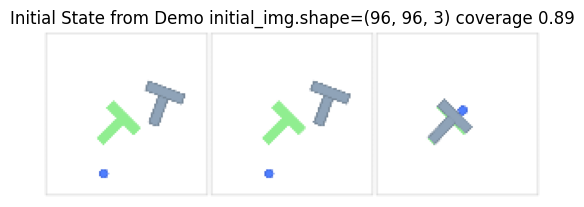

Episode replay complete. info['coverage']=0.8892695218325719
diff position +79.22


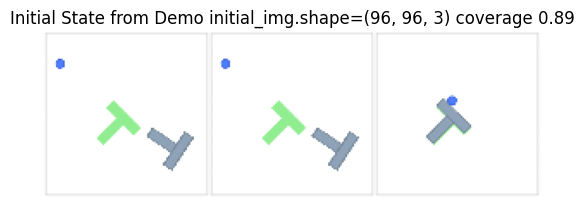

Episode replay complete. info['coverage']=0.8895605139860613
diff position +26.68


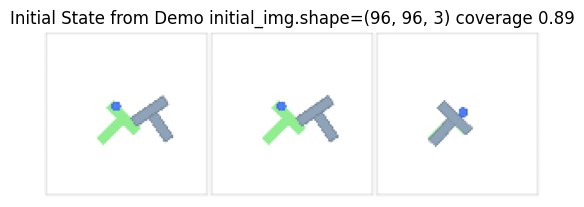

Episode replay complete. info['coverage']=0.8861912063179239
diff position +61.14


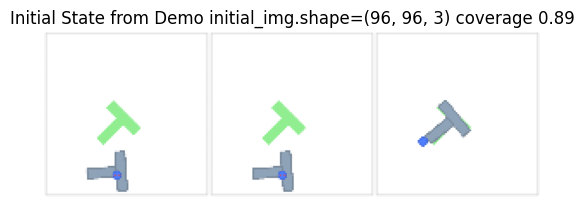

Episode replay complete. info['coverage']=0.8856441104642965
diff position +17.79


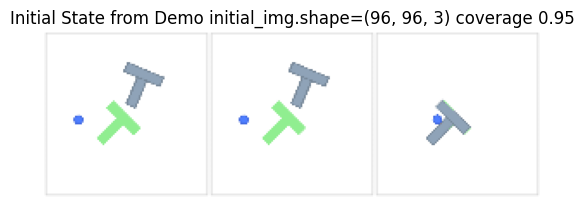

Episode replay complete. info['coverage']=0.9530710129795621
diff position +69.42


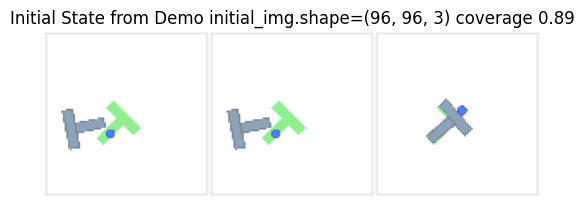

Episode replay complete. info['coverage']=0.8922787141759774
diff position +89.27


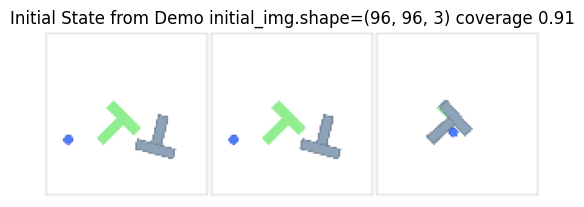

Episode replay complete. info['coverage']=0.9135354364638701
diff position +52.13


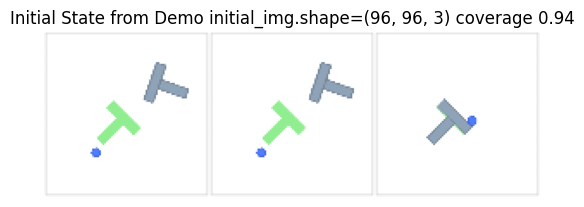

Episode replay complete. info['coverage']=0.93711255448312
diff position +55.70


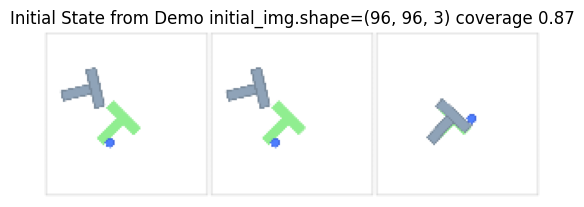

Episode replay complete. info['coverage']=0.8658402587692626
diff position +12.31


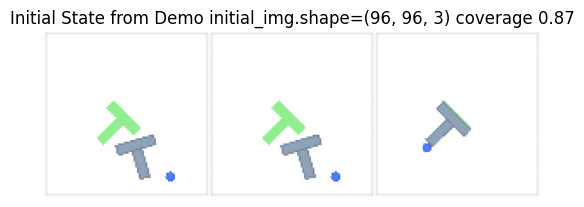

Episode replay complete. info['coverage']=0.8714407351378083
diff position +35.61


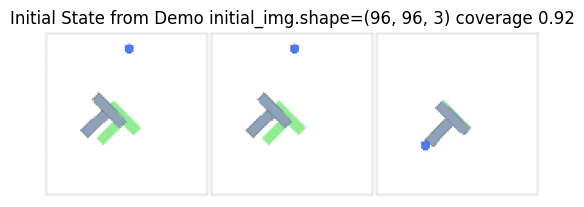

Episode replay complete. info['coverage']=0.9199776112011344
diff position +74.40


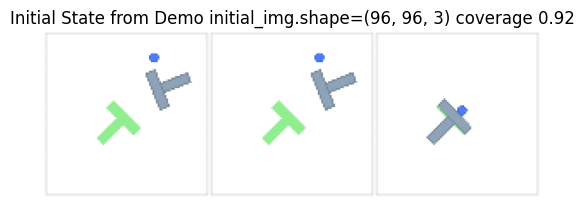

Episode replay complete. info['coverage']=0.9211902733371141
diff position +81.05


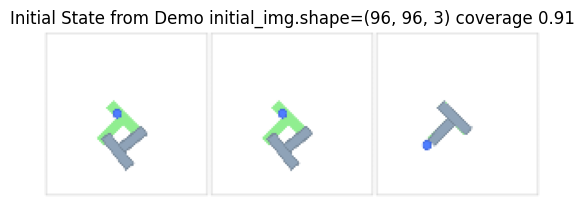

Episode replay complete. info['coverage']=0.914724939943939
diff position +65.58


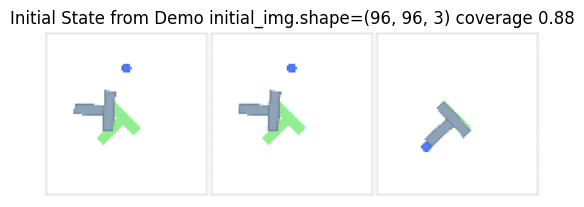

Episode replay complete. info['coverage']=0.8819691749570223
diff position +32.20


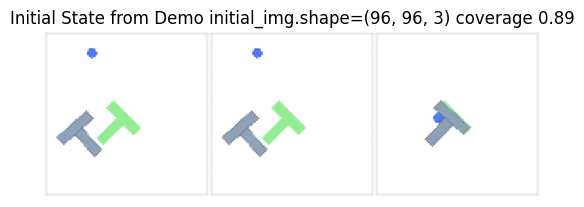

Episode replay complete. info['coverage']=0.8865604836730849
diff position +71.47


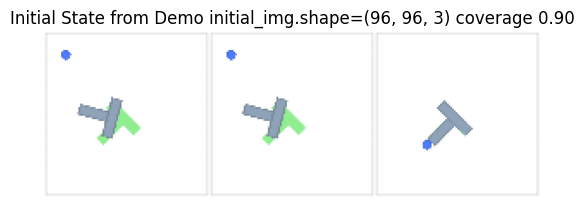

Episode replay complete. info['coverage']=0.9029949244277936
diff position +89.43


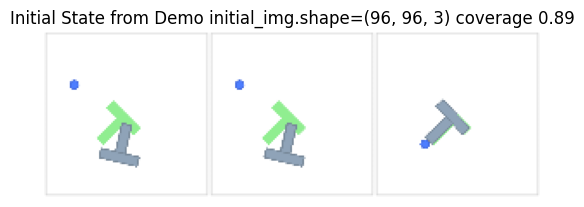

Episode replay complete. info['coverage']=0.8919986771805182
diff position +89.96


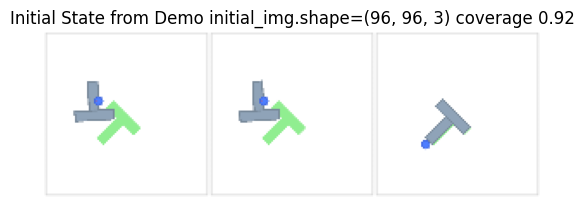

Episode replay complete. info['coverage']=0.9184328851049344
diff position +77.99


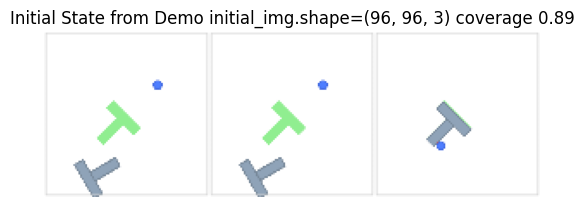

Episode replay complete. info['coverage']=0.8866355031139949
diff position +23.58


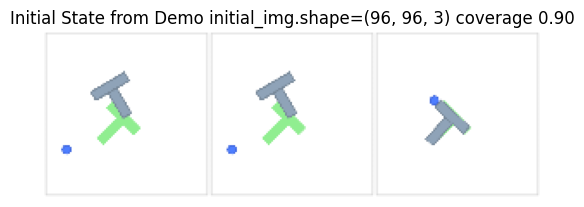

Episode replay complete. info['coverage']=0.8989361687244067
diff position +87.40


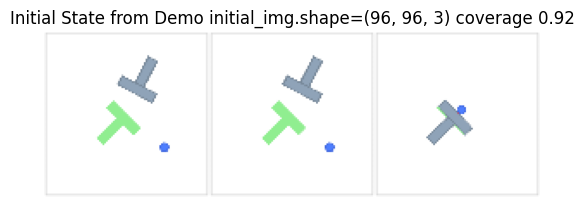

Episode replay complete. info['coverage']=0.921212345288008
diff position +56.38


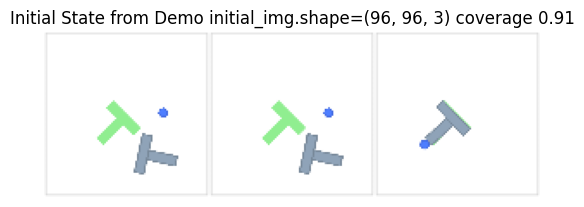

Episode replay complete. info['coverage']=0.9078283481598709
diff position +79.23


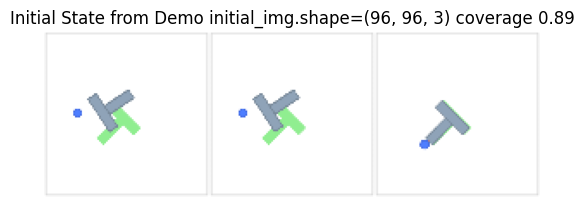

Episode replay complete. info['coverage']=0.8945089506097658
diff position +80.32


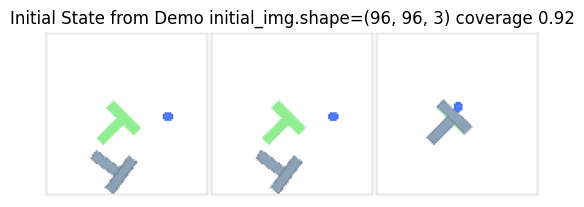

Episode replay complete. info['coverage']=0.9237193684512166
diff position +76.66


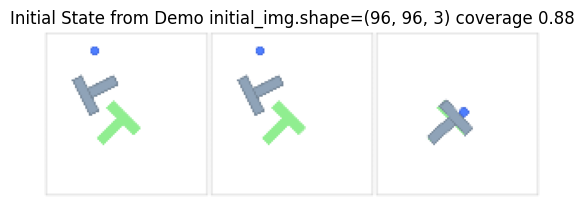

Episode replay complete. info['coverage']=0.8778272439075984
diff position +73.69


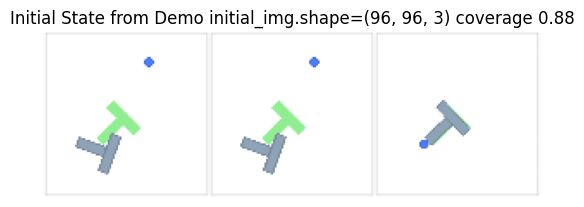

Episode replay complete. info['coverage']=0.8807326948977424
diff position +14.67


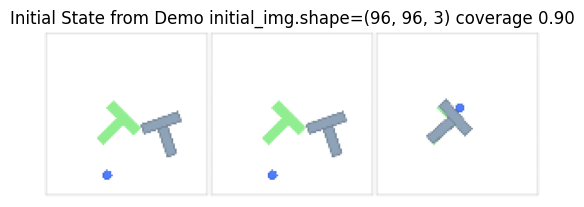

Episode replay complete. info['coverage']=0.9027081850452947
diff position +79.07


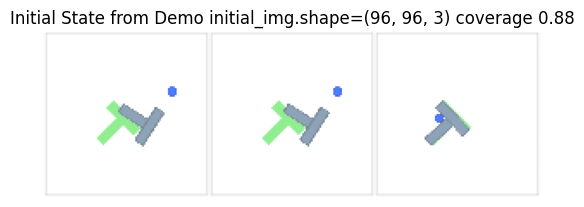

Episode replay complete. info['coverage']=0.8757749132710739
diff position +81.69


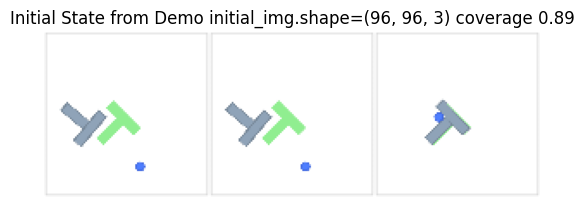

Episode replay complete. info['coverage']=0.8861750326788089
diff position +80.57


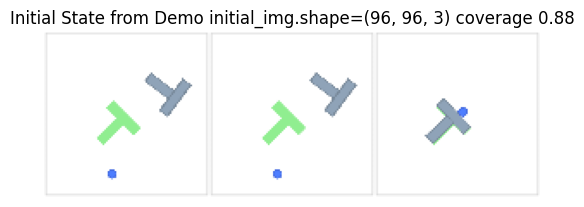

Episode replay complete. info['coverage']=0.882168923959403
diff position +67.93


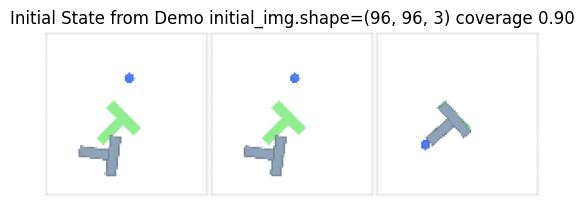

Episode replay complete. info['coverage']=0.8972552685882927
diff position +81.99


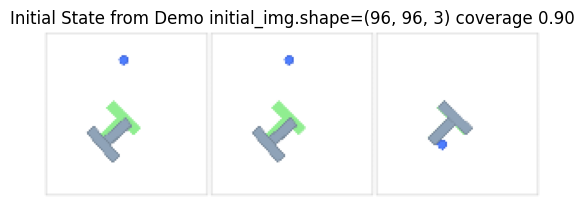

Episode replay complete. info['coverage']=0.9016821339257416
diff position +58.74


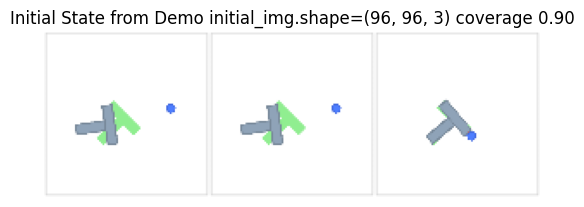

Episode replay complete. info['coverage']=0.904877331180778
diff position +28.36


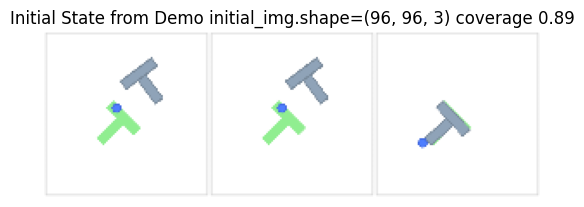

Episode replay complete. info['coverage']=0.8916667281106019
diff position +89.96


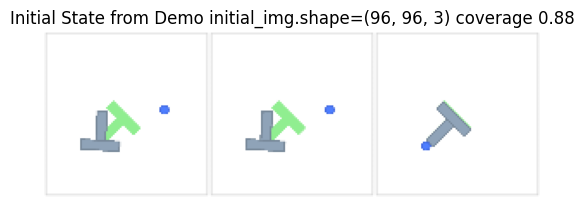

Episode replay complete. info['coverage']=0.8830809831673077
diff position +13.28


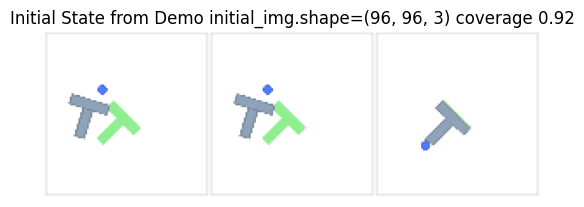

Episode replay complete. info['coverage']=0.9230232458265728
diff position +61.66


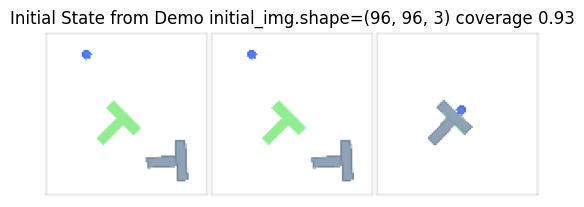

Episode replay complete. info['coverage']=0.9254290736442963
diff position +12.02


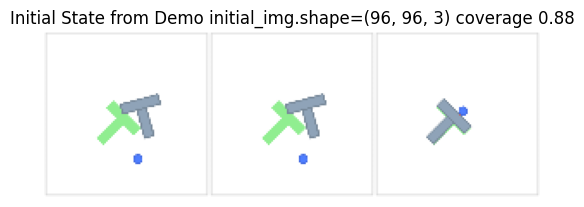

Episode replay complete. info['coverage']=0.8760636369857597
diff position +20.31


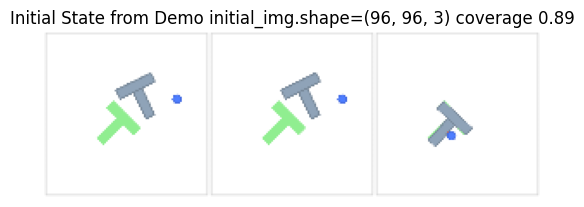

Episode replay complete. info['coverage']=0.8893112385546327
diff position +45.41


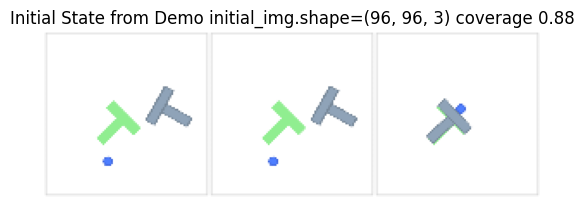

Episode replay complete. info['coverage']=0.8832263168369542
diff position +5.38


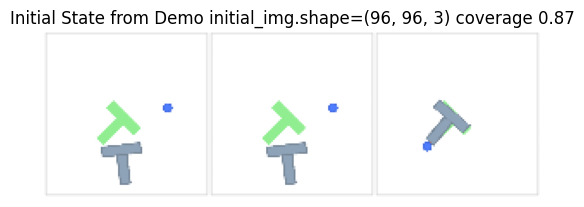

Episode replay complete. info['coverage']=0.8705697025777153
diff position +87.92


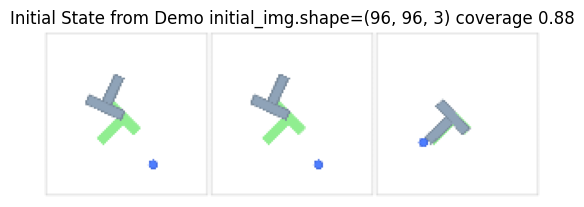

Episode replay complete. info['coverage']=0.8830893606065676
diff position +81.23


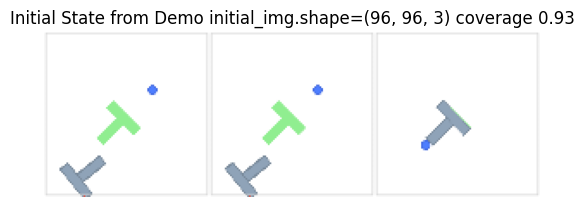

Episode replay complete. info['coverage']=0.933187876209217
diff position +25.49


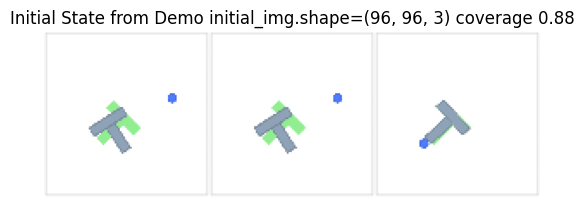

Episode replay complete. info['coverage']=0.8810676483070055
diff position +58.98


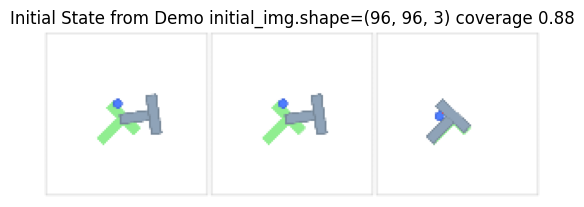

Episode replay complete. info['coverage']=0.8776298610598757
diff position +30.90


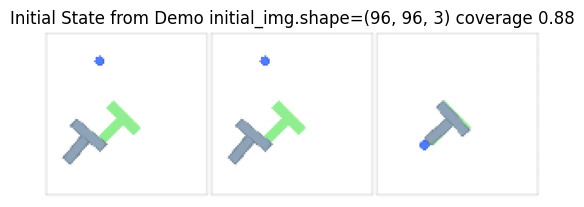

Episode replay complete. info['coverage']=0.8750710130145808
diff position +51.26


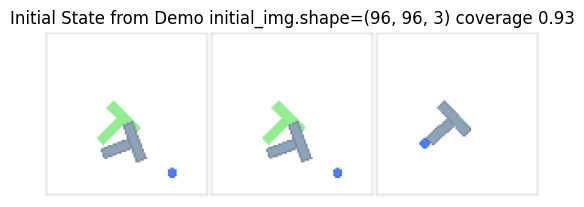

Episode replay complete. info['coverage']=0.926894810804954
diff position +24.62


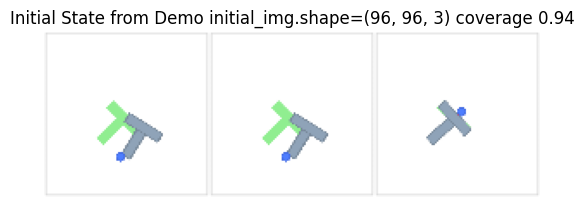

Episode replay complete. info['coverage']=0.9430910231819406
diff position +59.74


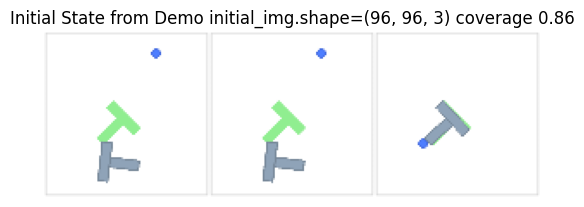

Episode replay complete. info['coverage']=0.8637480050706164
diff position +56.50


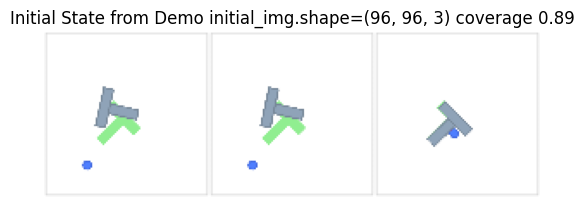

Episode replay complete. info['coverage']=0.8910049325727577
diff position +88.84


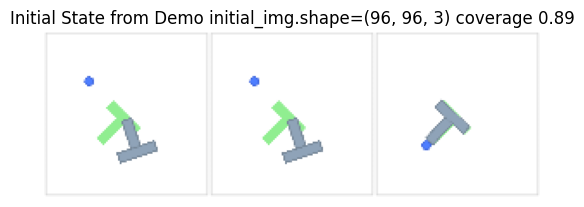

Episode replay complete. info['coverage']=0.894517218888107
diff position +5.09


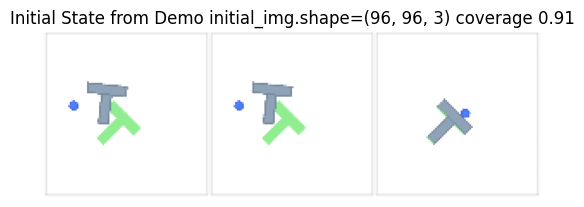

Episode replay complete. info['coverage']=0.9137315454070716
diff position +56.65


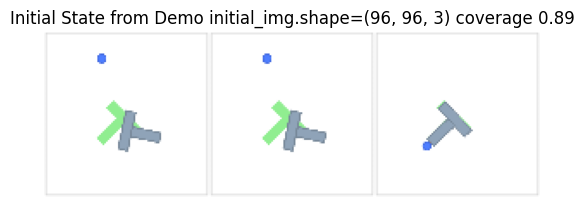

Episode replay complete. info['coverage']=0.8864216339395672
diff position +89.85


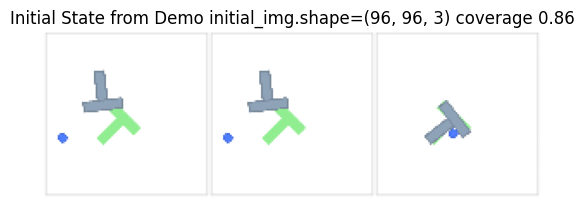

Episode replay complete. info['coverage']=0.8610726449701878
diff position +6.16


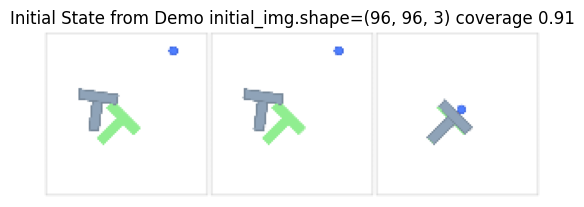

Episode replay complete. info['coverage']=0.9107850357471323
diff position +88.51


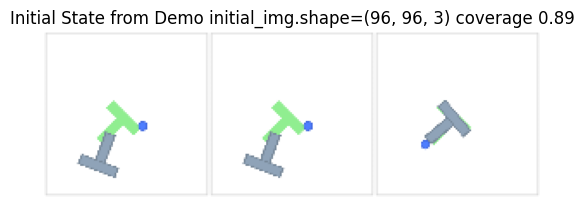

Episode replay complete. info['coverage']=0.8925690334551653
diff position +48.10


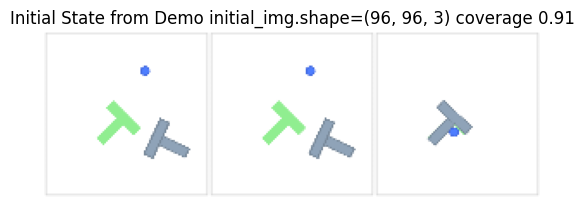

Episode replay complete. info['coverage']=0.9110687404553779
diff position +29.93


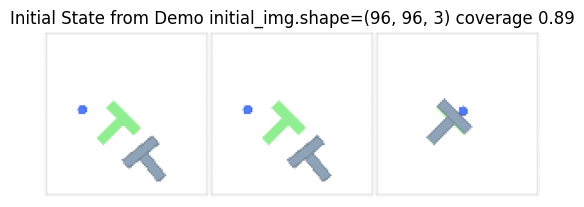

Episode replay complete. info['coverage']=0.8936960192596226
diff position +58.83


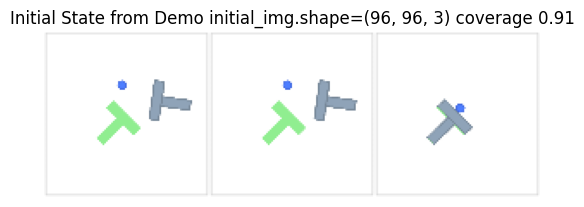

Episode replay complete. info['coverage']=0.9093008350494787
diff position +82.07


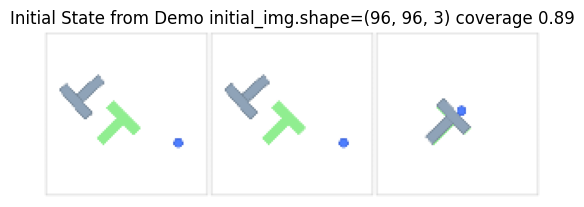

Episode replay complete. info['coverage']=0.8904140930067035
diff position +88.59


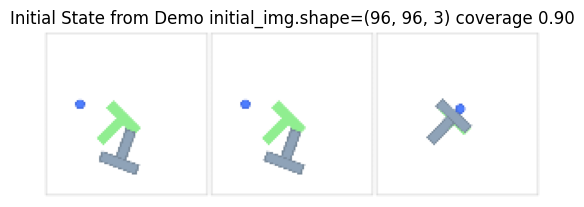

Episode replay complete. info['coverage']=0.9030559778372628
diff position +28.23


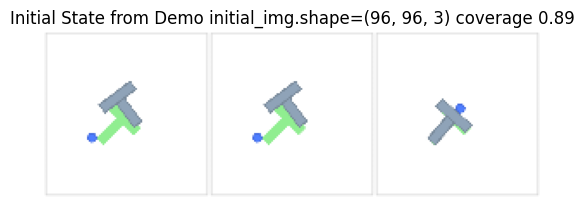

Episode replay complete. info['coverage']=0.8863899701080759
diff position +88.45


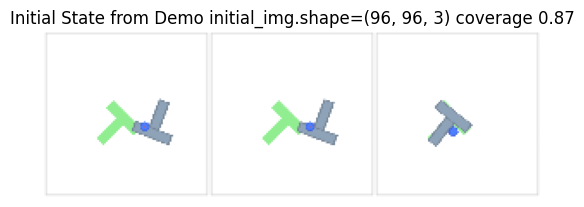

Episode replay complete. info['coverage']=0.8720937745187504
diff position +26.97


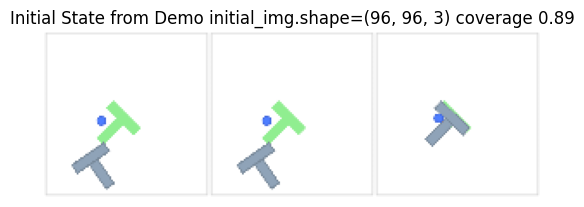

Episode replay complete. info['coverage']=0.8946909816880814
diff position +14.49


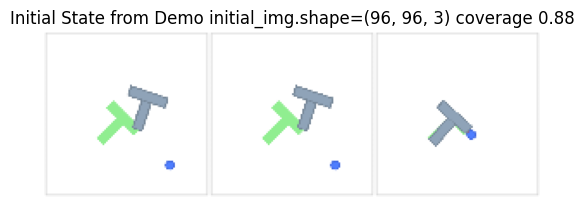

Episode replay complete. info['coverage']=0.8837006470810926
diff position +23.34


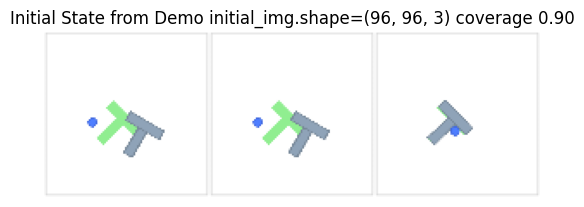

Episode replay complete. info['coverage']=0.9007075456549047
diff position +80.19


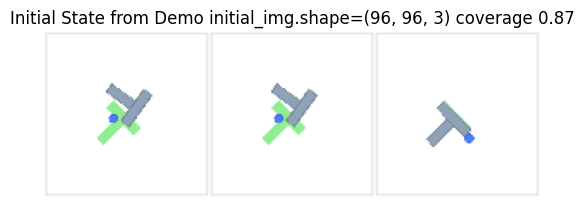

Episode replay complete. info['coverage']=0.8724411359870513
diff position +89.79


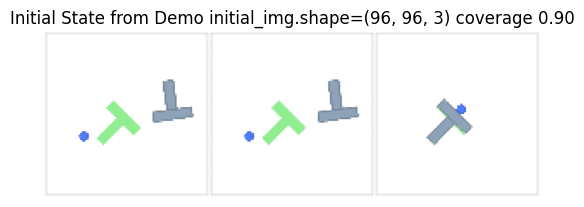

Episode replay complete. info['coverage']=0.9033114213069063
diff position +90.00


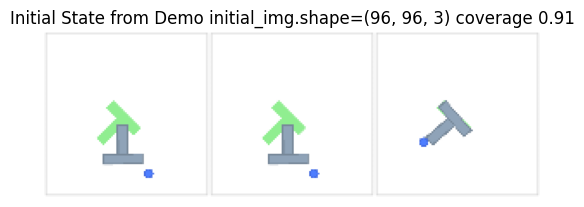

Episode replay complete. info['coverage']=0.9137002218121465
diff position +67.81


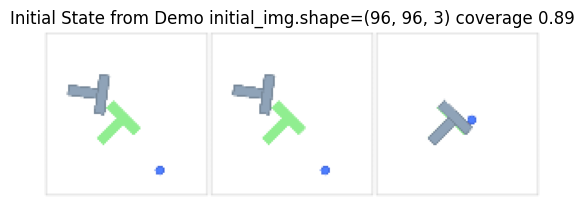

Episode replay complete. info['coverage']=0.8887085995934714
diff position +85.45


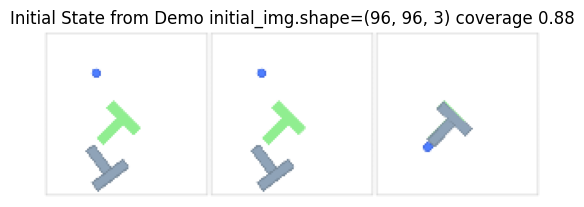

Episode replay complete. info['coverage']=0.8768396527251855
diff position +63.94


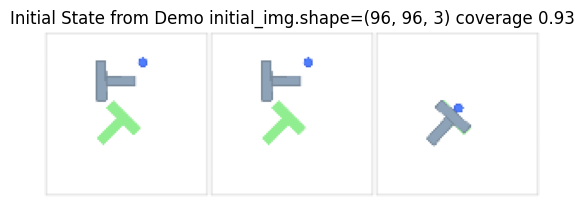

Episode replay complete. info['coverage']=0.9309158139229705
diff position +11.10


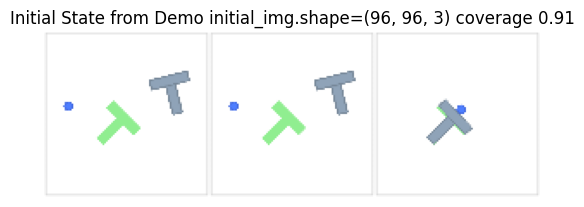

Episode replay complete. info['coverage']=0.9110776628225098
diff position +20.49


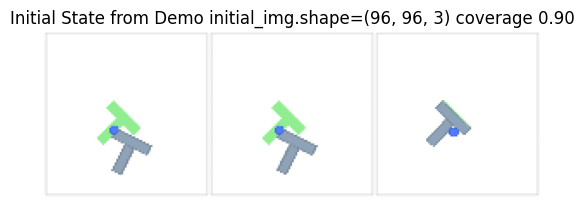

Episode replay complete. info['coverage']=0.9018877397681769
diff position +57.40


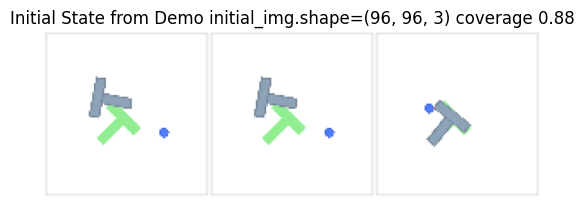

Episode replay complete. info['coverage']=0.8813828461871995
diff position +52.12


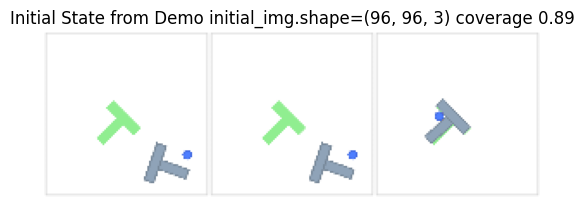

Episode replay complete. info['coverage']=0.88588321590625
diff position +87.61


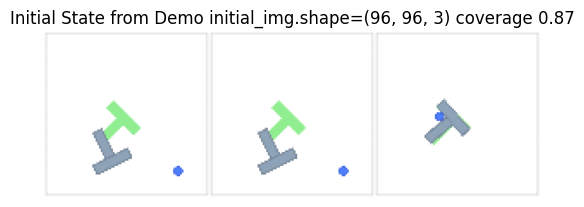

Episode replay complete. info['coverage']=0.8710454533733462
diff position +67.63


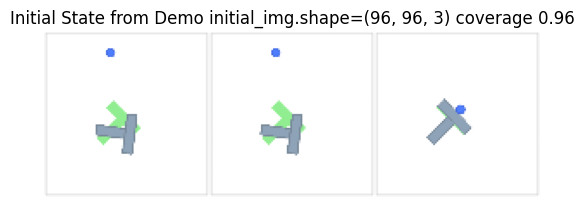

Episode replay complete. info['coverage']=0.9588049540803638
diff position +88.22


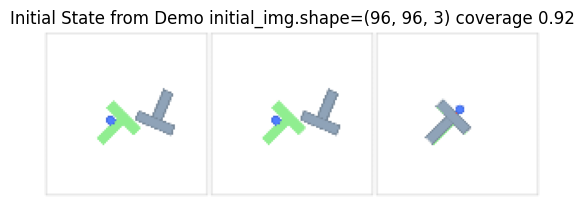

Episode replay complete. info['coverage']=0.9249559447274232
diff position +43.93


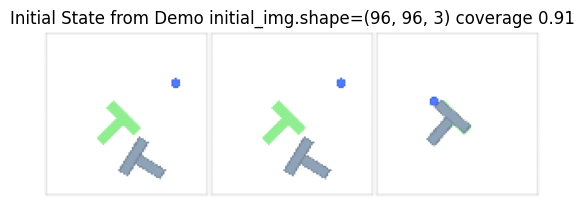

Episode replay complete. info['coverage']=0.9116501399957908
diff position +89.61


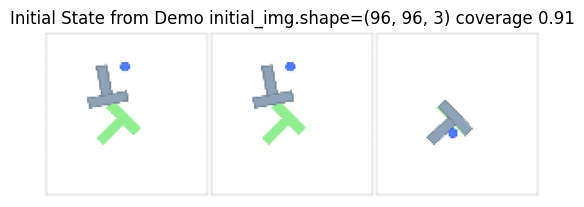

Episode replay complete. info['coverage']=0.9121503891559861
diff position +76.90


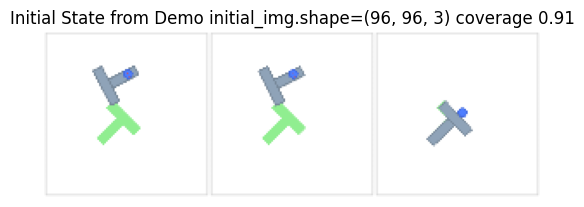

Episode replay complete. info['coverage']=0.9124832478006121
diff position +66.14


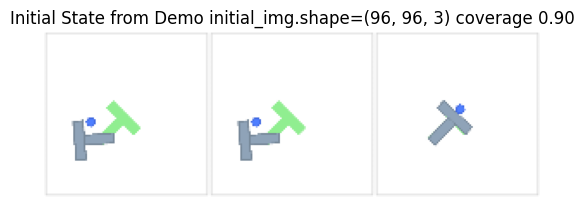

Episode replay complete. info['coverage']=0.9005544492679463
diff position +53.70


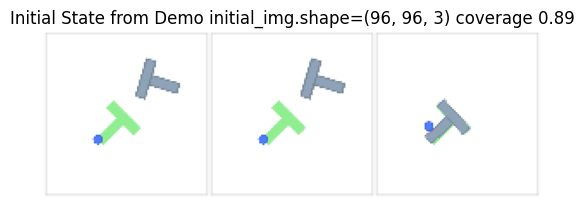

Episode replay complete. info['coverage']=0.894147564578143
diff position +64.36


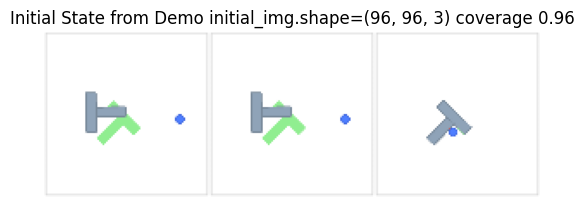

Episode replay complete. info['coverage']=0.95807209317726
diff position +1.60


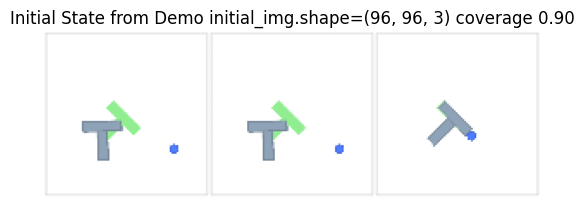

Episode replay complete. info['coverage']=0.8961186805774174
diff position +36.84


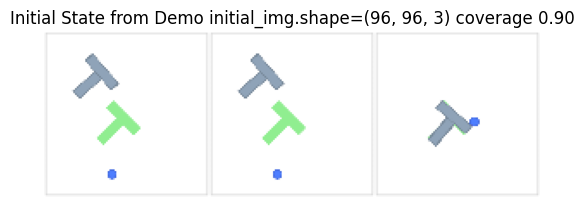

Episode replay complete. info['coverage']=0.9016441258658763
diff position +43.31


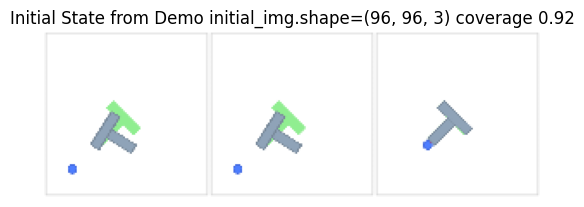

Episode replay complete. info['coverage']=0.9166694297762481
diff position +39.43


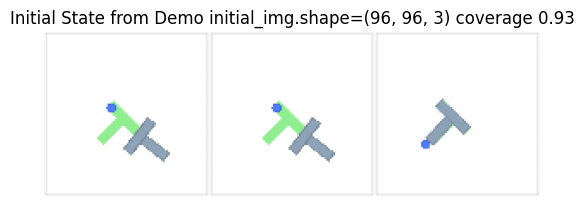

Episode replay complete. info['coverage']=0.9313350786176241
diff position +42.54


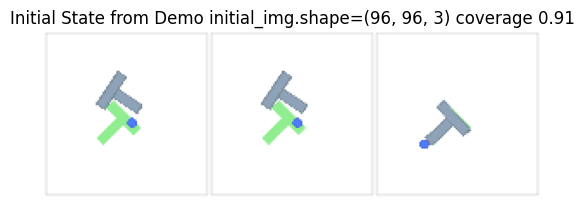

Episode replay complete. info['coverage']=0.9139990201954955
diff position +86.37


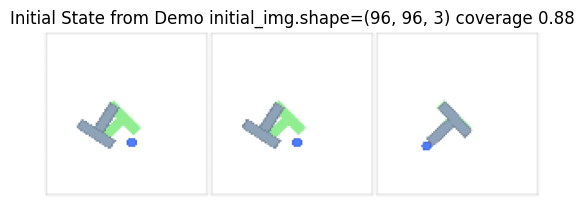

Episode replay complete. info['coverage']=0.8805904806179673
diff position +86.90


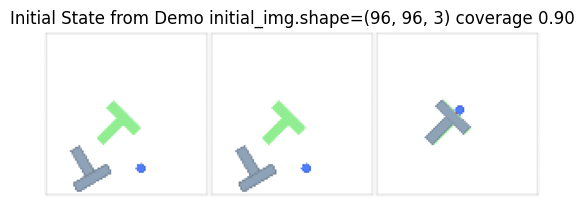

Episode replay complete. info['coverage']=0.8978124255179348
diff position +52.90


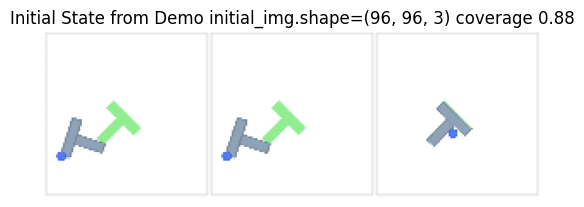

Episode replay complete. info['coverage']=0.8823221565783467
diff position +34.02


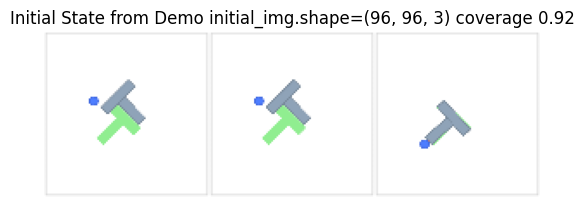

Episode replay complete. info['coverage']=0.9215863744160802
diff position +86.18


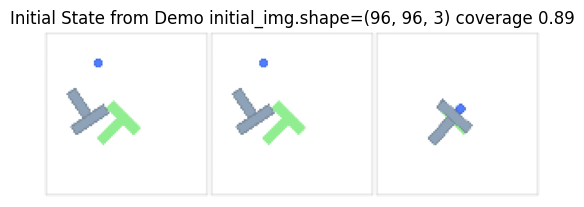

Episode replay complete. info['coverage']=0.8889520367475191
diff position +15.59


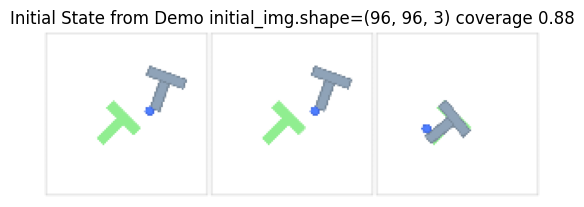

Episode replay complete. info['coverage']=0.8838984769679078
diff position +6.86


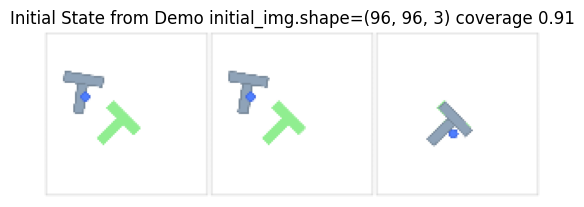

Episode replay complete. info['coverage']=0.9082460354135613
diff position +79.24


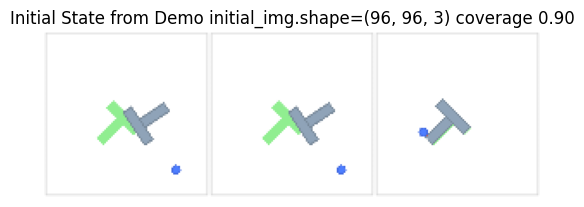

Episode replay complete. info['coverage']=0.9020631949375397
diff position +72.35


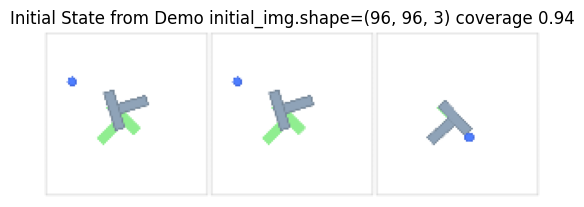

Episode replay complete. info['coverage']=0.9436693038546727
diff position +17.83


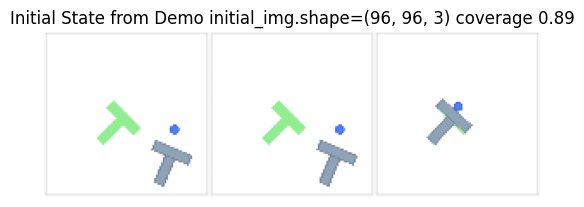

Episode replay complete. info['coverage']=0.8936111616667594
diff position +83.40


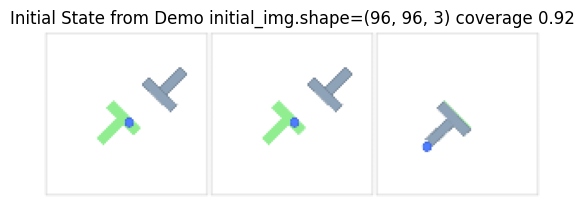

Episode replay complete. info['coverage']=0.9160579508770715
diff position +37.98


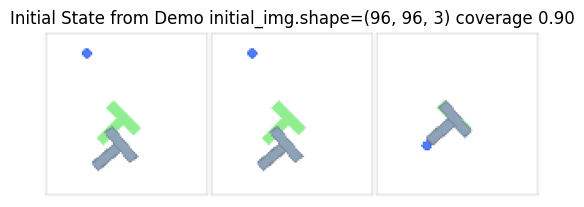

Episode replay complete. info['coverage']=0.8964981386286645
diff position +85.44


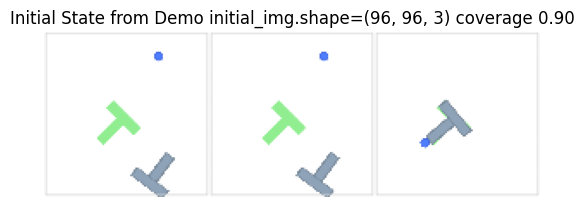

Episode replay complete. info['coverage']=0.9025577686168428
diff position +89.96


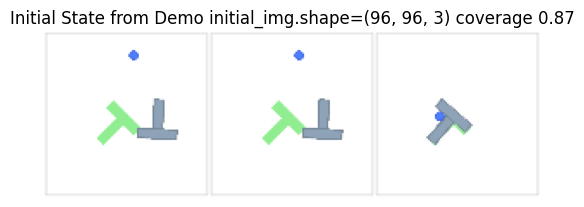

Episode replay complete. info['coverage']=0.8732382579937185
diff position +44.94


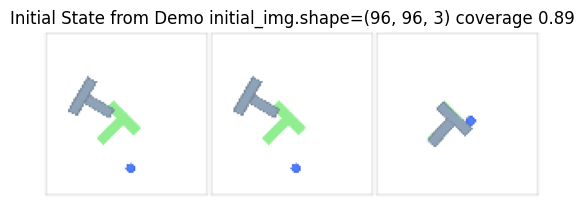

Episode replay complete. info['coverage']=0.8895691178915183
diff position +84.41


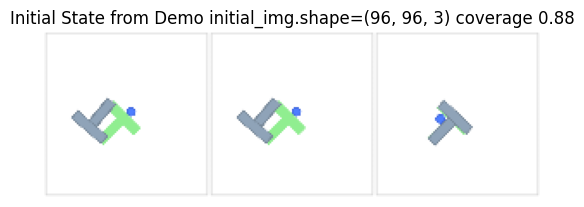

Episode replay complete. info['coverage']=0.8751087187855955
diff position +49.46


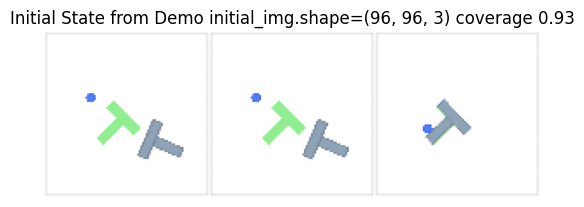

Episode replay complete. info['coverage']=0.9287483061035455
diff position +11.10


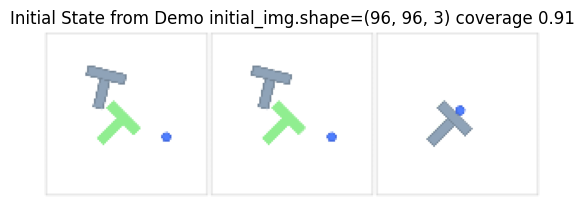

Episode replay complete. info['coverage']=0.9107014482699116
diff position +88.87


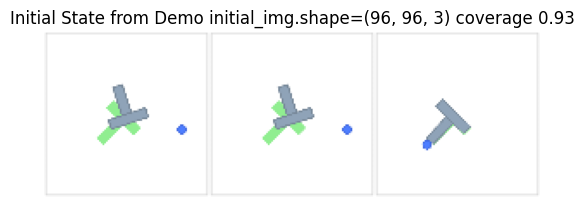

Episode replay complete. info['coverage']=0.9308251945511625
diff position +88.32


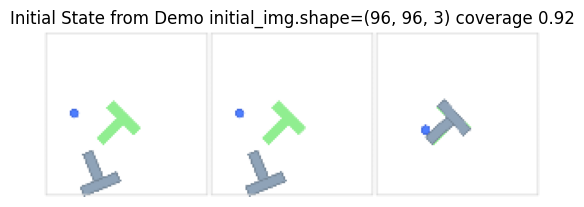

Episode replay complete. info['coverage']=0.9176894454594757
diff position +88.92


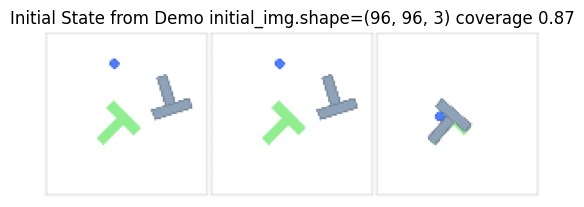

Episode replay complete. info['coverage']=0.8660638030510736
diff position +79.11


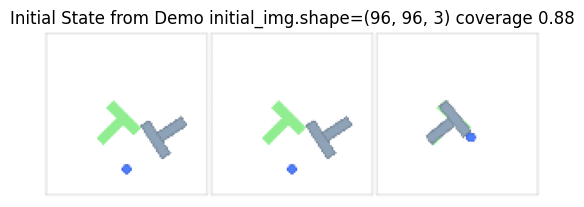

Episode replay complete. info['coverage']=0.8809157860589225
diff position +86.06


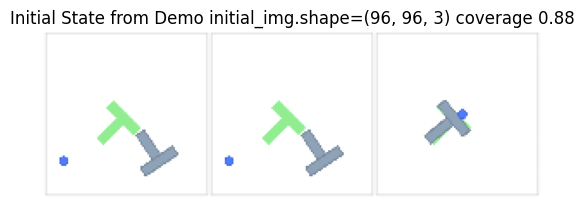

Episode replay complete. info['coverage']=0.8754171495919288
diff position +67.24


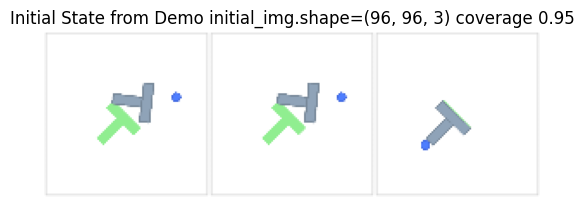

Episode replay complete. info['coverage']=0.9518872723837204
diff position +72.41


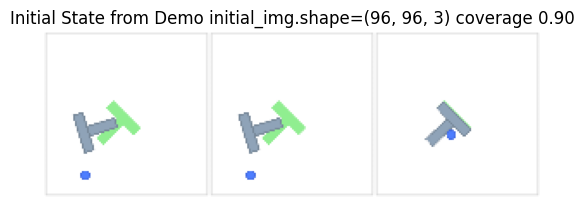

Episode replay complete. info['coverage']=0.8965633830611242
diff position +85.93


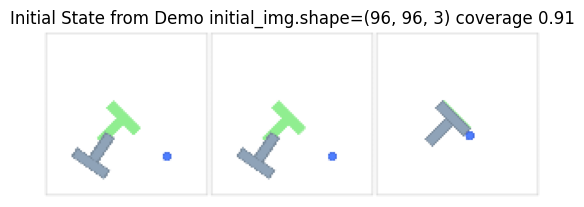

Episode replay complete. info['coverage']=0.9143620440733842
diff position +24.93


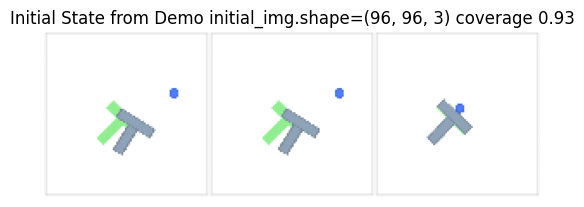

Episode replay complete. info['coverage']=0.9262108482350874
diff position +88.43


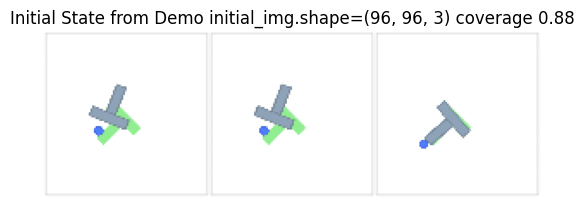

Episode replay complete. info['coverage']=0.8772995815906934
diff position +63.55


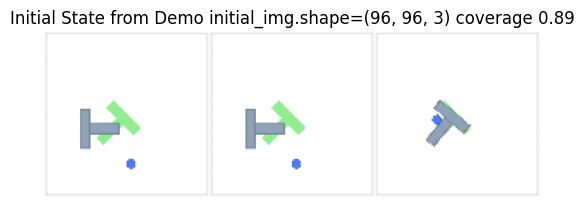

Episode replay complete. info['coverage']=0.8927068806108551
diff position +12.88


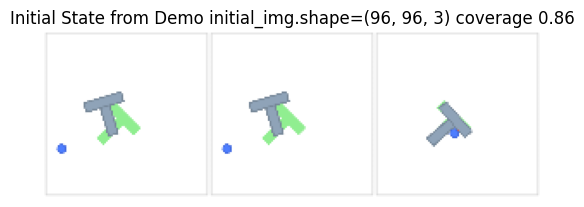

Episode replay complete. info['coverage']=0.8644132020577312
diff position +90.00


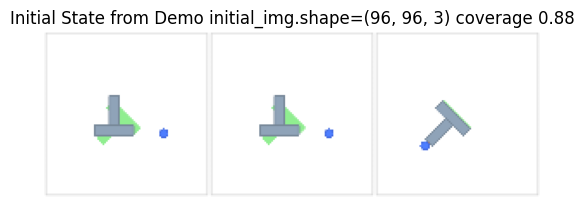

Episode replay complete. info['coverage']=0.8824337125961395
diff position +21.44


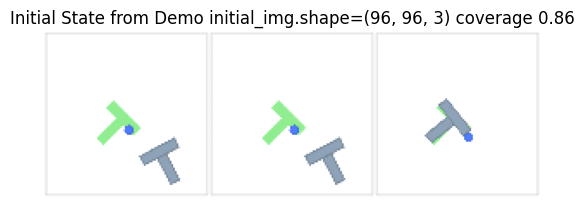

Episode replay complete. info['coverage']=0.8605002277967748
diff position +61.56


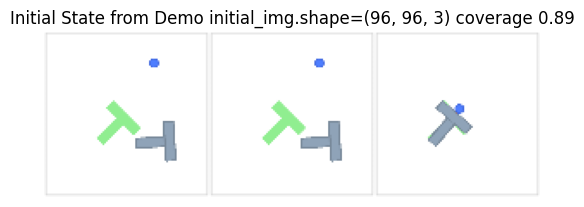

Episode replay complete. info['coverage']=0.8929635009372436
diff position +25.60


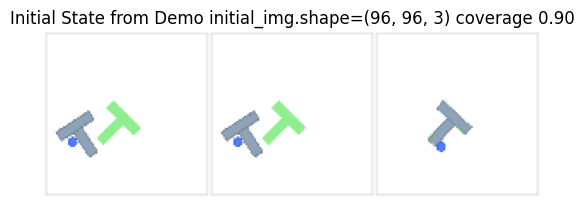

Episode replay complete. info['coverage']=0.9049787416779425
diff position +19.82


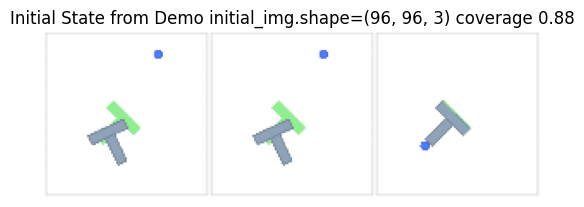

Episode replay complete. info['coverage']=0.881886500476368
diff position +11.49


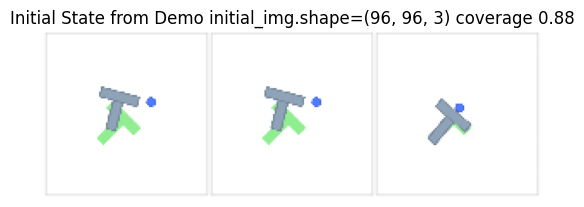

Episode replay complete. info['coverage']=0.8819257468013356
diff position +88.11


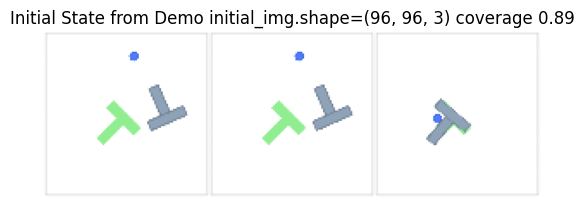

Episode replay complete. info['coverage']=0.8915916361576857
diff position +86.93


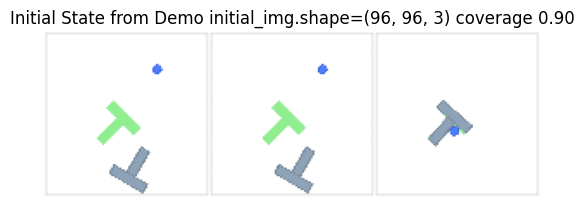

Episode replay complete. info['coverage']=0.8973634978526137
diff position +86.73


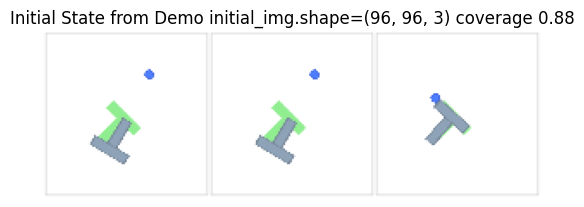

Episode replay complete. info['coverage']=0.8764963951855971
diff position +61.64


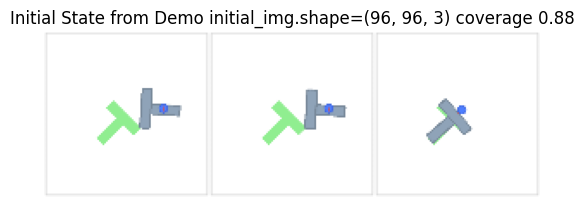

Episode replay complete. info['coverage']=0.8770634545660126
diff position +89.72


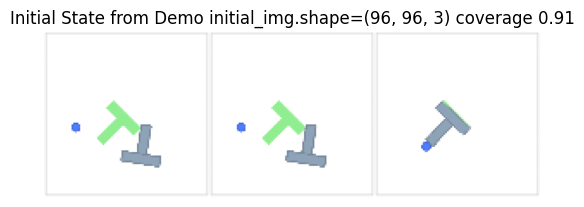

Episode replay complete. info['coverage']=0.9132739204682918
diff position +80.39


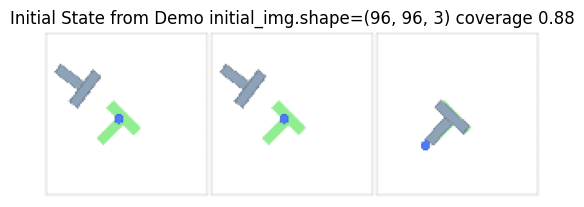

Episode replay complete. info['coverage']=0.8822307083327534
diff position +61.45


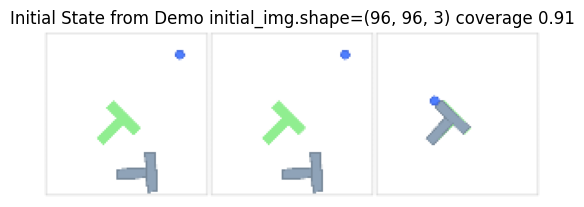

Episode replay complete. info['coverage']=0.9067808993398073
diff position +88.47


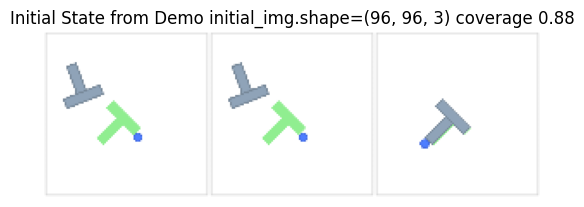

Episode replay complete. info['coverage']=0.8764243659831177
diff position +67.65


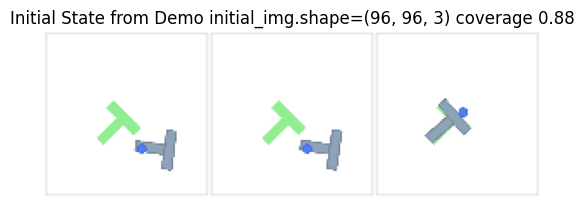

Episode replay complete. info['coverage']=0.8770447197088391
diff position +33.00


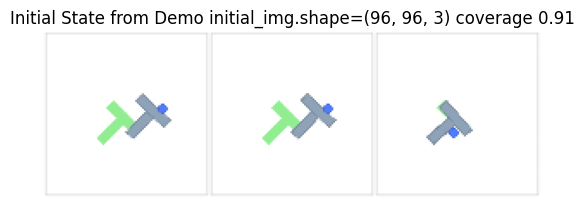

Episode replay complete. info['coverage']=0.9073527199653915
diff position +51.19


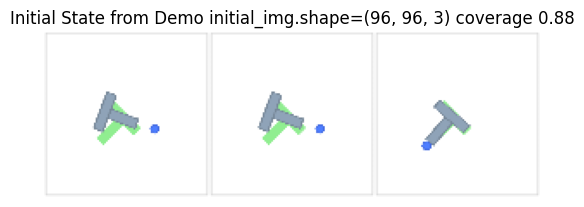

Episode replay complete. info['coverage']=0.8807192815764997
diff position +7.22


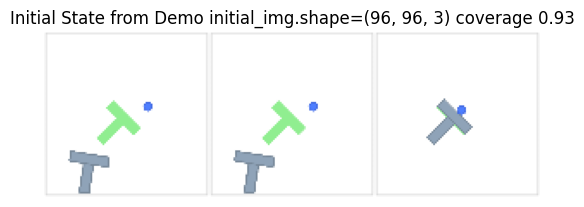

Episode replay complete. info['coverage']=0.9345830077516998
diff position +37.35


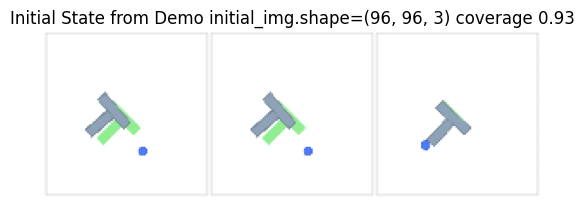

Episode replay complete. info['coverage']=0.9301790880550964
diff position +35.34


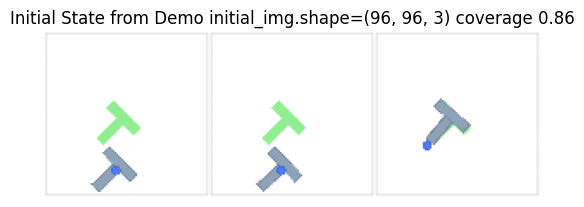

Episode replay complete. info['coverage']=0.8645632804907037
diff position +89.86


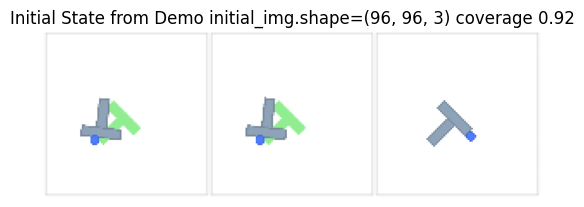

Episode replay complete. info['coverage']=0.9218656504158658
diff position +87.02


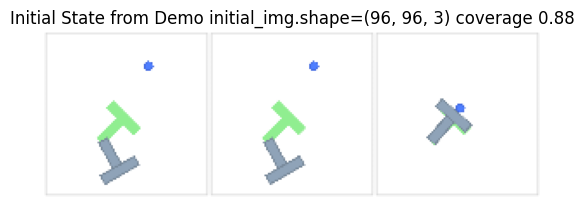

Episode replay complete. info['coverage']=0.8762644828431603
diff position +89.99


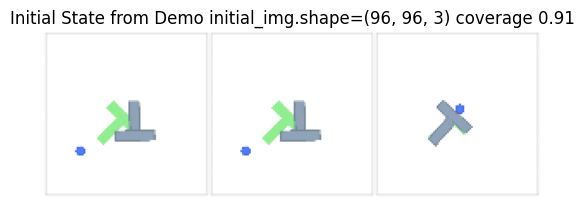

Episode replay complete. info['coverage']=0.9086939413574194
diff position +53.20


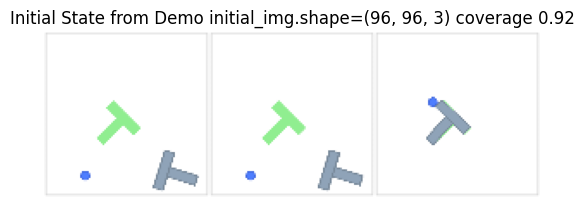

Episode replay complete. info['coverage']=0.9158802759453177
diff position +38.23


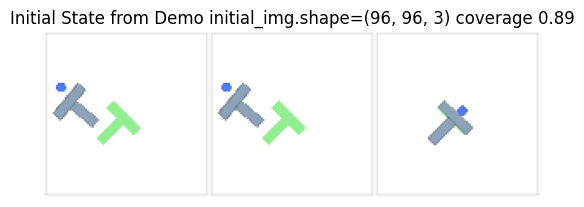

Episode replay complete. info['coverage']=0.8889885189514158
diff position +80.27


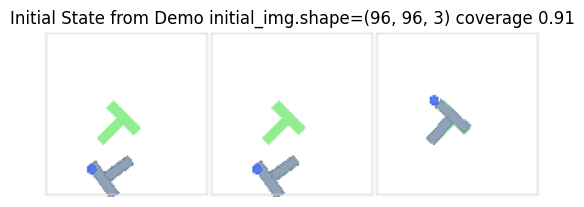

Episode replay complete. info['coverage']=0.9074566108701995
diff position +20.97


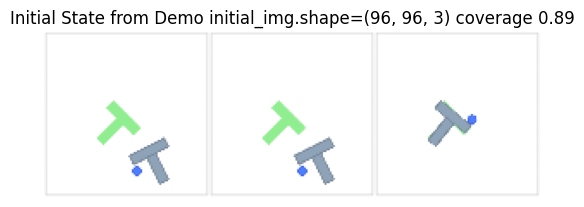

Episode replay complete. info['coverage']=0.8863521285706466
diff position +88.27


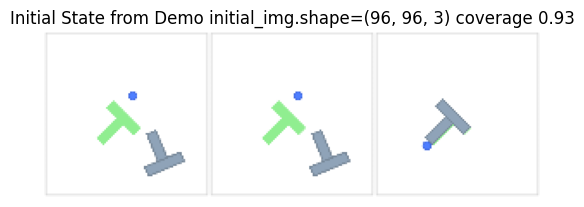

Episode replay complete. info['coverage']=0.9288837871585455
diff position +37.09


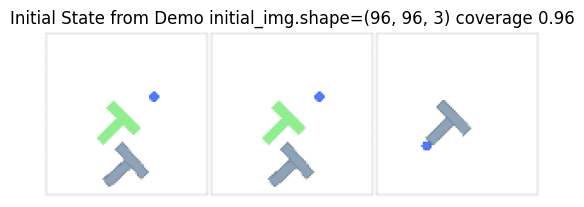

Episode replay complete. info['coverage']=0.9585972531542282
diff position +0.88


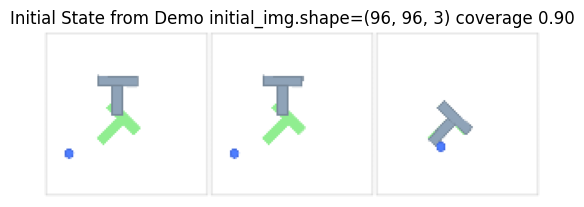

Episode replay complete. info['coverage']=0.8954704684235348
diff position +57.25


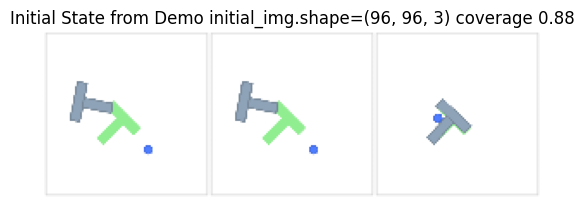

Episode replay complete. info['coverage']=0.8815579621581022
diff position +85.44


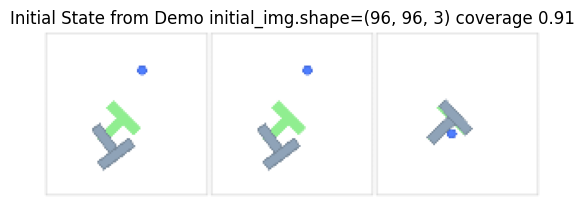

Episode replay complete. info['coverage']=0.914127506173245
diff position +54.42


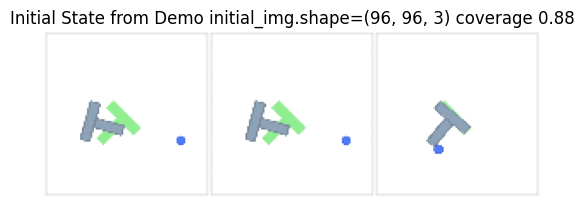

Episode replay complete. info['coverage']=0.8812410445383683
diff position +5.37


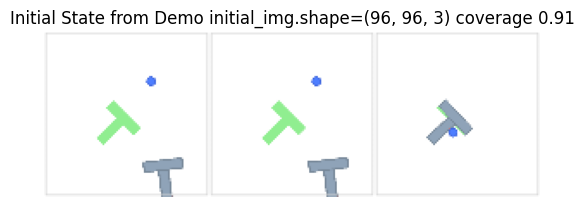

Episode replay complete. info['coverage']=0.9064660813414046
diff position +19.18


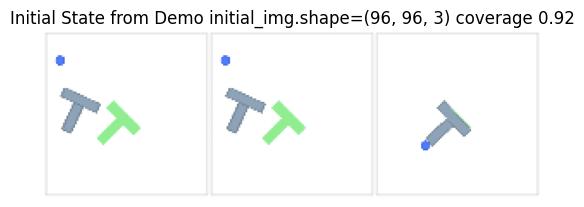

Episode replay complete. info['coverage']=0.9187331901032781
diff position +22.82


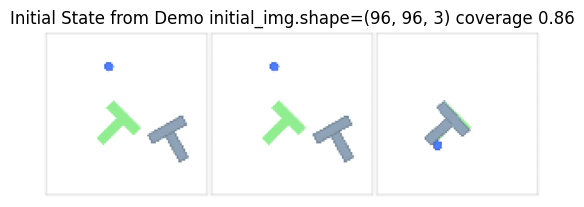

Episode replay complete. info['coverage']=0.8625357926871539
diff position +20.66


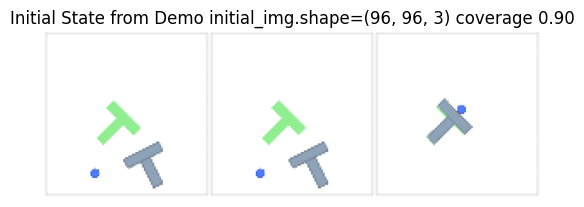

Episode replay complete. info['coverage']=0.9048501852782956
diff position +64.05


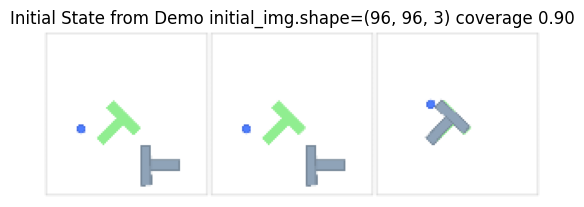

Episode replay complete. info['coverage']=0.903720035062551
diff position +83.73


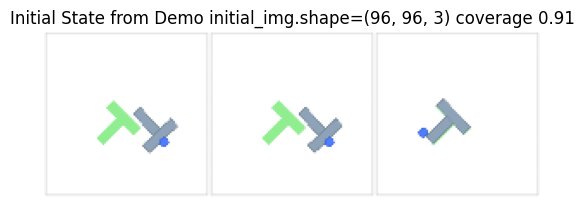

Episode replay complete. info['coverage']=0.9073787743044347


: 

In [ ]:
import collections

def load_pusht_demos(zarr_path):
    """
    Loads actions and states from Zarr and splits them into episodes
    based on 'meta/episode_ends'.
    """
    root = zarr.open(zarr_path, mode='r')
    
    # Load raw flattened arrays
    all_actions = root['data/action'][:]
    all_states = root['data/state'][:]
    episode_ends = root['meta/episode_ends'][:]
    
    episodes = []
    start_idx = 0
    
    for end_idx in episode_ends:
        # Slice the data for this specific episode
        episode_data = {
            'action': all_actions[start_idx:end_idx],
            'state': all_states[start_idx:end_idx],
            # We don't strictly need images for replay (we can render live), 
            # but you can load them here if needed:
            'img': root['data/img'][start_idx:end_idx],
            'keypoint': root['data/keypoint'][start_idx:end_idx]
        }
        episodes.append(episode_data)
        start_idx = end_idx
        
    print(f"Loaded {len(episodes)} episodes.")
    return episodes

import time
def replay_demo(env, episode_data, fps=60):
    """
    Resets the environment to the demo's initial state and replays actions.
    """
    
    # 2. Force the environment state to match the demo's first frame.
    #    The state usually contains [agent_x, agent_y, block_x, block_y, block_theta].
    #    Without this, the block will be in a random spot and the actions won't make sense.
    initial_state = episode_data['state'][0]

    # 1. Reset environment for the wrappers and then for the initial state
    env.reset()
    obs, info = env.unwrapped.reset(options={"reset_to_state": initial_state})
    for _ in range(100): # takes time to arrive at the target state
        env.unwrapped._set_state(initial_state)
    env_img = env.render()
    # print(f"{initial_state=}")
    # show the initial image in episode_data
    initial_img = episode_data['img'][0].astype(np.uint8)
    final_img = episode_data['img'][-1].astype(np.uint8)


    print(f'diff position {np.linalg.norm(obs - initial_state):+1.2f}')

    # 3. Execute actions
    actions = episode_data['action']
    
    for action in actions:
        # Step the environment
        obs, reward, terminated, truncated, info = env.step(action)
        final_env_img = env.render()
        
        # Render is handled automatically by render_mode='human' in env creation
        # If you need to slow it down to be viewable:
        # plt.pause(1/fps) 
        time.sleep(1/fps)

    toshow = np.hstack([initial_img, env_img, final_env_img])
    plt.imshow(toshow)
    plt.axis('off')
    plt.title(f"Initial State from Demo {initial_img.shape=} coverage {info['coverage']:1.2f}")
    plt.show(block=False)
    print(f"Episode replay complete. {info['coverage']=}")

    return info['coverage']

# --- Usage ---
import copy, collections
# 1. Load the episodes
demos = load_pusht_demos(ZARR_PATH)

coverages = collections.defaultdict(list)
# # 2. Replay the first 3 episodes
for y_offset in [0]: #range(40,50,1):
    env = make_env()
    coverage = []
    for i in range(206):
    # for i in [1]:
        # print(f"Replaying Episode {i}...")
        offset = [0, 0] # find_offset(ZARR_PATH, ep_idx=i)
        coverage.append(replay_demo(env, copy.deepcopy(demos[i]), fps=120))
    coverages[y_offset] = coverage

# # Close env when done
# time.sleep(1)
# env.close()

In [ ]:
env = make_env()
# reset to 0s state
env.unwrapped.reset(options={"reset_to_state": np.zeros(5)})    